# Sentinel-2 L2A Analytic (GeoTIFF)
This notebook provides details on how to access Sentinel-2 data (L2A pre-processing or Bottom Of Atmosphere (BOA) reflectance images) with 13 bands. The 13 bands include 4 visible bands (10 m resolution), 6 Near-Infrared bands (20 m resolution), and 3 Short-Wave Infrared bands (60 m resolution).The Sentinel-2 mission is a land monitoring constellation of two satellites that provide high resolution optical imagery and provide continuity for the current SPOT and Landsat missions. The mission provides a global coverage of the Earth's land surface every 5 days, making the data of great use in on-going studies.Important application areas for Sentinel-2 imagery are: land cover monitoring (agriculture, forestry), coastal area monitoring, inland water monitoring, glacier monitoring and flood mapping
Sentinel-2 Level-2A products have been available over Europe since March 2018, and later extended gloablly as of December 2018.

In [2]:
# import SDK
import up42

# Import all other libraries
import rasterio
from rasterio.plot import show, reshape_as_image
from matplotlib import pyplot
import numpy as np

# Image processing libraries
import cv2 as cv

In [3]:
# Authenticate user and initialise project
up42.authenticate(project_id="5678", 
                  project_api_key="uvwx")
project = up42.initialize_project()

2021-03-26 09:15:33,372 - Authentication with UP42 successful!
2021-03-26 09:15:34,984 - Initialized Project(name: S2l2a-Analytics-data-example, project_id: 1f2bad99-daad-4a60-9192-5169263caff6, description: , createdAt: 2021-03-18T14:39:08.255254Z)


In [4]:
# Define the aoi
aoi = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
              [
                14.610298,
                -24.516841
              ],
              [
                14.622478,
                -24.516841
              ],
              [
                14.622478,
                -24.50833
              ],
              [
                14.610298,
                -24.50833
              ],
              [
                14.610298,
                -24.516841
              ]
          ]
        ]
      }
    }
  ]
}

In [5]:
# Construct the workflow
workflow = project.create_workflow(name="Sentinel2-l2-analytic-example", use_existing=True)
input_tasks = ["Sentinel-2 L2A Analytic (GeoTIFF)"]
workflow.add_workflow_tasks(input_tasks)

2021-03-26 09:15:37,621 - Getting existing workflows in project ...
2021-03-26 09:15:38,433 - Got 1 workflows for project 1f2bad99-daad-4a60-9192-5169263caff6.
100%|██████████| 1/1 [00:00<00:00,  1.38it/s]
2021-03-26 09:15:39,174 - Using existing workflow: Sentinel2-l2-analytic-example - 00e94c32-7cfe-40b8-85b6-cc2ffa980c75
2021-03-26 09:15:43,692 - Added tasks to workflow: [{'name': 'esa-s2-l2a-gtiff-analytic:1', 'parentName': None, 'blockId': 'e13d8e92-2763-4640-80d6-1501b2729707'}]


In [6]:
# Define the aoi and input parameters of the workflow to run it
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation='intersects', 
                                                 start_date="2018-11-07", 
                                                 end_date="2020-12-31",
                                                 limit=1)
input_parameters["esa-s2-l2a-gtiff-analytic:1"].update({"max_cloud_cover":10})

In [7]:
# Price Estimation
workflow.estimate_job(input_parameters)

2021-03-26 09:15:55,252 - Estimated: 1-1 Credits, Duration: 0-0 min.


{'esa-s2-l2a-gtiff-analytic:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0,
    'max': 0},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [8]:
# Run test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-26 09:15:56,756 - +++++++++++++++++++++++++++++++++
2021-03-26 09:15:56,759 - Running this job as Test Query...
2021-03-26 09:15:56,760 - +++++++++++++++++++++++++++++++++
2021-03-26 09:15:56,762 - Selected input_parameters: {'esa-s2-l2a-gtiff-analytic:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}, 'config': {'mode': 'DRY_RUN'}}
2021-03-26 09:15:58,420 - Created and running new job: f3ca40b6-1d0b-4fee-8d6f-71706533a206.
2021-03-26 09:15:58,992 - Tracking job status continuously, reporting every 30 seconds...
2021-03-26 09:16:22,059 - Job finished successfully! - f3ca40b6-1d0b-4fee-8d6f-71706533a206


In [9]:
# Run actual Job
job = workflow.run_job(input_parameters, track_status=True)

2021-03-26 09:19:12,550 - Selected input_parameters: {'esa-s2-l2a-gtiff-analytic:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}}
2021-03-26 09:19:17,696 - Created and running new job: e62aeea4-5425-42c2-b2f7-3680ca529482.
2021-03-26 09:19:18,363 - Tracking job status continuously, reporting every 30 seconds...
2021-03-26 09:19:53,438 - Job is RUNNING! - e62aeea4-5425-42c2-b2f7-3680ca529482
2021-03-26 09:20:27,237 - Job is RUNNING! - e62aeea4-5425-42c2-b2f7-3680ca529482
2021-03-26 09:21:01,182 - Job is RUNNING! - e62aeea4-5425-42c2-b2f7-3680ca529482
2021-03-26 09:21:23,823 - Job finished successfully! - e62aeea4-5425-42c2-b2f7-3680ca529482


In [10]:
# Downlod Results
job.download_results()

2021-03-26 09:23:06,100 - Downloading results of job e62aeea4-5425-42c2-b2f7-3680ca529482
2021-03-26 09:23:06,104 - Download directory: /Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482
115it [00:00, 42185.15it/s]
2021-03-26 09:23:10,641 - Download successful of 15 files to output_directory '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482': ['data.json', 'S2B_33JVN_20201215_0_L2A_B08.tif', 'S2B_33JVN_20201215_0_L2A_B09.tif', 'S2B_33JVN_20201215_0_L2A_B8A.tif', 'S2B_33JVN_20201215_0_L2A_WVP.tif', 'S2B_33JVN_20201215_0_L2A_B01.tif', 'S2B_33JVN_20201215_0_L2A_B02.tif', 'S2B_33JVN_20201215_0_L2A_B03.tif', 'S2B_33JVN_20201215_0_L2A_B07.tif', 'S2B_33JVN_20201215_0_L2A_B06.tif', 'S2B_33JVN_20201215_0_L2A_B12.tif', 'S2B_33JVN_20201215_0_L2A_vrt.vrt', 'S2B_33JVN_20201215_0_L2A_B04.tif', '

['/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482/data.json',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482/S2B_33JVN_20201215_0_L2A/S2B_33JVN_20201215_0_L2A_B08.tif',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482/S2B_33JVN_20201215_0_L2A/S2B_33JVN_20201215_0_L2A_B09.tif',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482/S2B_33JVN_20201215_0_L2A/S2B_33JVN_20201215_0_L2A_B8A.tif',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/data-block-examples/project_1f2bad99-daad-4a60-9192-5169263caff6/job_e62aeea4-5425-42c2-b2f7-3680ca529482/S2B_33JVN_20201215_0_L2A/S2B

### Stack multiple RGB bands to plot a data visualisation for Sentinel2-l2-A data. 

the downloaded files might not produce a vrt file, therefore:
1. Find the rgb and stack them in rasterio. 
2. Save as a new '.tif' file.  
3. Plot the file using pyplot. 

In [11]:
# Identify the RGB bands
band4 = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B04.tif'
band3 = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B03.tif'
band2 = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B02.tif'

In [12]:
# Assign bands to a list
file_list = [band4, band3, band2]

In [13]:
# Read metadata of first file. 
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

In [14]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 124,
 'height': 96,
 'count': 1,
 'crs': CRS.from_epsg(32733),
 'transform': Affine(10.0, 0.0, 460520.0,
        0.0, -10.0, 7289450.0)}

In [15]:
# Update meta to reflect the number of layers
meta.update(count = len(file_list))

In [16]:
# Read each layer and assign it to a stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start = 1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

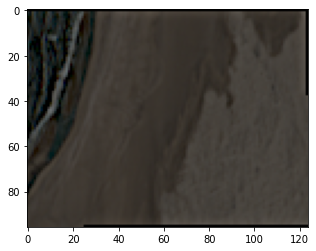

In [17]:
# Normalise and plot results. 
with rasterio.open('stack.tif') as src:
   # show(src.read())
    img= src.read()
    img8 = (img / 65535.) ** (1/2.2)
    #img8=(255*img/ np.max(img)).astype(np.uint8)
    #img = src.read().astype("uint8")
    #img8 = cv.normalize(img, None, 0,255,cv.NORM_MINMAX, dtype=cv.CV_8U)
   # img8 = (img/256).astype("uint8")
    pyplot.imshow(reshape_as_image(img8))